## Gaussian Process with 1 Hyperparameter

Here is a simple funktion used to better understand what happen in the process. 

In [1]:
# here are things to alter 

# Acqusition function - options are ei, ucb and poi
acq_ = 'ei'

# how many random tries it start with
random_tries= 2

In [2]:
#imports
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec

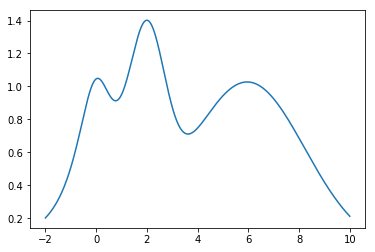

In [3]:
#definition of the function

#this is our easy funktion we try to get the maximum value
def target(x):
    return np.exp(-(x - 2)**2) + np.exp(-(x - 6)**2/10) + 1/ (x**2 + 1)

x = np.linspace(-2, 10, 10000).reshape(-1, 1)
k=0
y = target(x)

plt.plot(x, y)

In [4]:
#imports the main class that is necessary to start the programm
from gp_optimize import GPOptimize
GP = GPOptimize({'x':(-2,10)},random_tries=random_tries, kind=acq_, func= target)

In [5]:
# these are only imported to print then surrogate function , mean and varianz
from gaussian_process import GaussianProcess
GPR = GaussianProcess(acq_)

from acqusition_func import Acqusition_func
AC = Acqusition_func()

In [6]:
#this function is only here to print the surrogate funktion
def predict(gp, x_obs, y_obs, grid):
    GPR.fit(x_obs, y_obs)

    mean, std = GPR._gp.predict(grid, return_std=True)
    return mean, std

def plot_gp(gp, x, y,name):
    fig = plt.figure(figsize=(16, 10))
    #steps = len(GP.x)
    fig.suptitle(
        'Gaussian Process and Utility Function After ',
        fontdict={'size':30}
    )

    gs = gridspec.GridSpec(2, 1, height_ratios=[3, 1]) 
    axis = plt.subplot(gs[0])
    acq = plt.subplot(gs[1])

    
    x_obs = np.array(GP.hp)
    y_obs = np.array(GP.results)
    
    mean, std = predict(gp, x_obs, y_obs, x)
    #the real function we normally not know
    axis.plot(x, y, linewidth=3, label='Target')
    #the points we tested
    axis.plot(x_obs.flatten(), y_obs, 'D', markersize=8, label=u'Observations', color='r')
    #prints the mean of the surrogate function
    axis.plot(x, mean, '--', color='k', label='Prediction')
    
    #print the variance of the surrogate function
    axis.fill(np.concatenate([x, x[::-1]]), 
              np.concatenate([mean - 1.9600 * std, (mean + 1.9600 * std)[::-1]]),
        alpha=.6, fc='c', ec='None', label='95% confidence interval')
    

    
    axis.set_xlim((-2, 10))
    axis.set_ylim((None, None))
    axis.set_ylabel('f(x)', fontdict={'size':20})
    axis.set_xlabel('x', fontdict={'size':20})
    
    #second plot 
    #prints the acqusitionfunction with the max of it
    utility = GPR.acq_func.get_acq(x, GPR._gp,result_max=GP.result_max,kindAcq=acq_)
    acq.plot(x, utility, label='Utility Function', color='purple')
    acq.plot(x[np.argmax(utility)], np.max(utility), '*', markersize=15, 
             label=u'Next Best Guess', markerfacecolor='gold', markeredgecolor='k', markeredgewidth=1)
    acq.set_xlim((-2, 10))
    print(x[np.argmax(utility)])
    
    axis.legend(loc=2, bbox_to_anchor=(1.01, 1), borderaxespad=0.)
    acq.legend(loc=2, bbox_to_anchor=(1.01, 1), borderaxespad=0.)
    
    plt.show()
    #plt.savefig(name)

In [7]:
# first step with random
GP.do_one_step()

{'x': 2.4109485334962146}


In [8]:
#second step also random
GP.do_one_step()

{'x': 6.360043296674449}


[-2.]


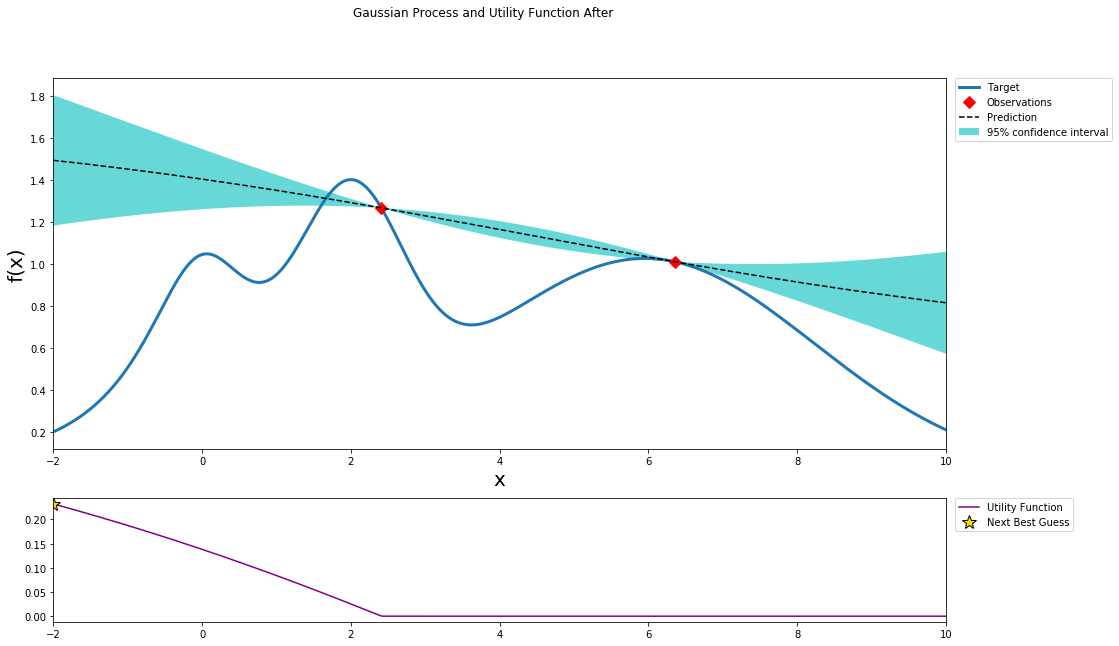

In [9]:
plot_gp(GP, x, y, "bla")

In [10]:
#third step - gaussian process
GP.do_one_step()

{'x': -2.0000000000000004}


[10.]


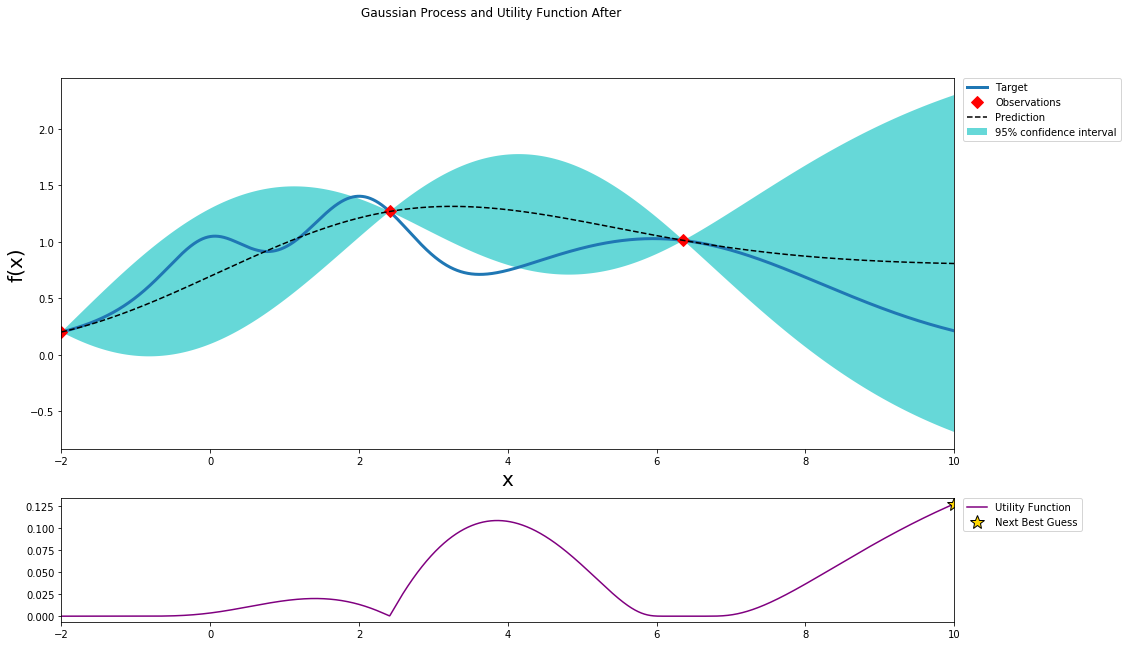

In [11]:
plot_gp(GP, x, y, "name")

In [12]:
GP.do_one_step()

{'x': 10.0}


[3.8229823]


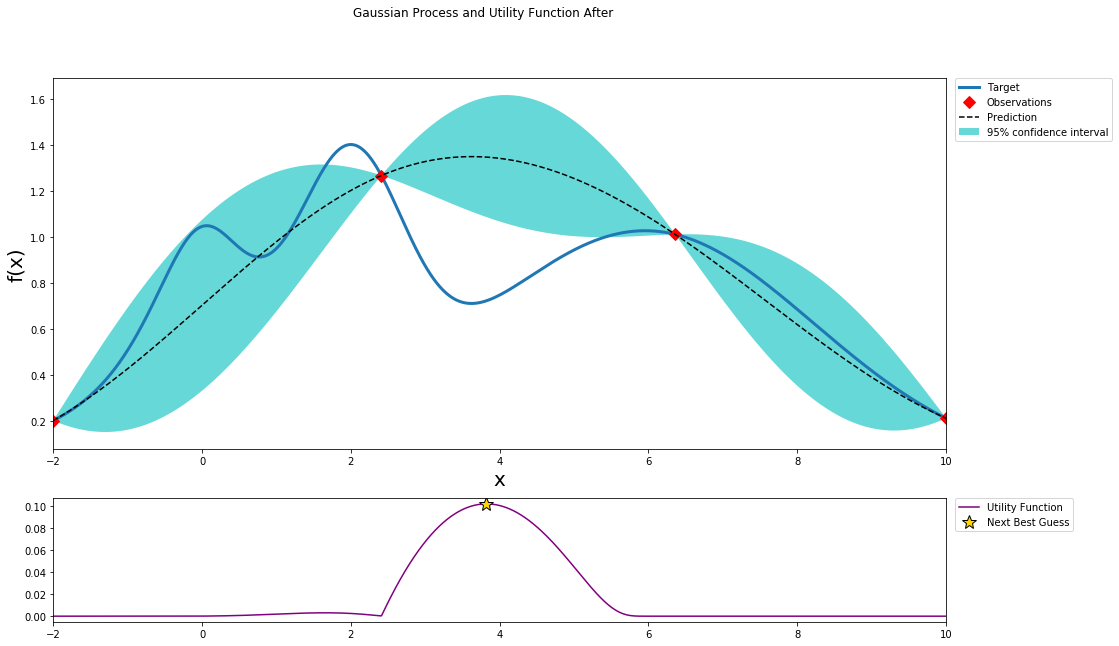

In [13]:
plot_gp(GP, x, y, "bla")

In [14]:
GP.do_one_step()

{'x': 3.8235337839751384}


[1.14911491]


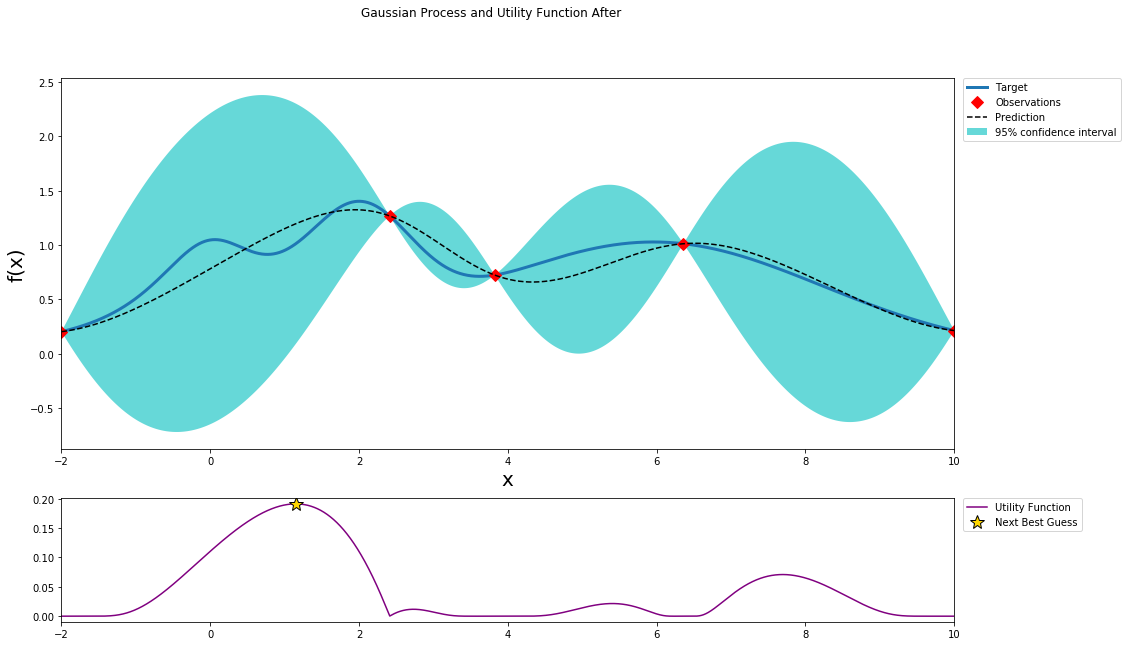

In [15]:
plot_gp(GP, x, y, "bla")

In [16]:
GP.do_one_step()

{'x': 7.693852348662469}


[1.24992499]


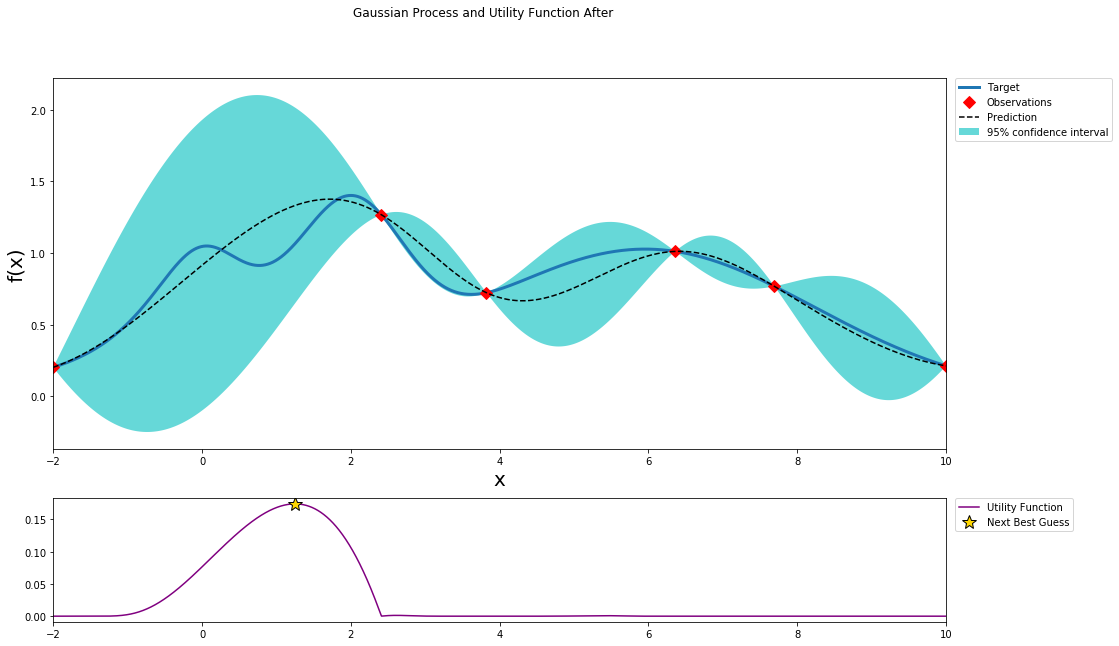

In [17]:
plot_gp(GP, x, y, "bla")

In [18]:
GP.do_one_step()

{'x': 5.386674805006883}


[1.27752775]


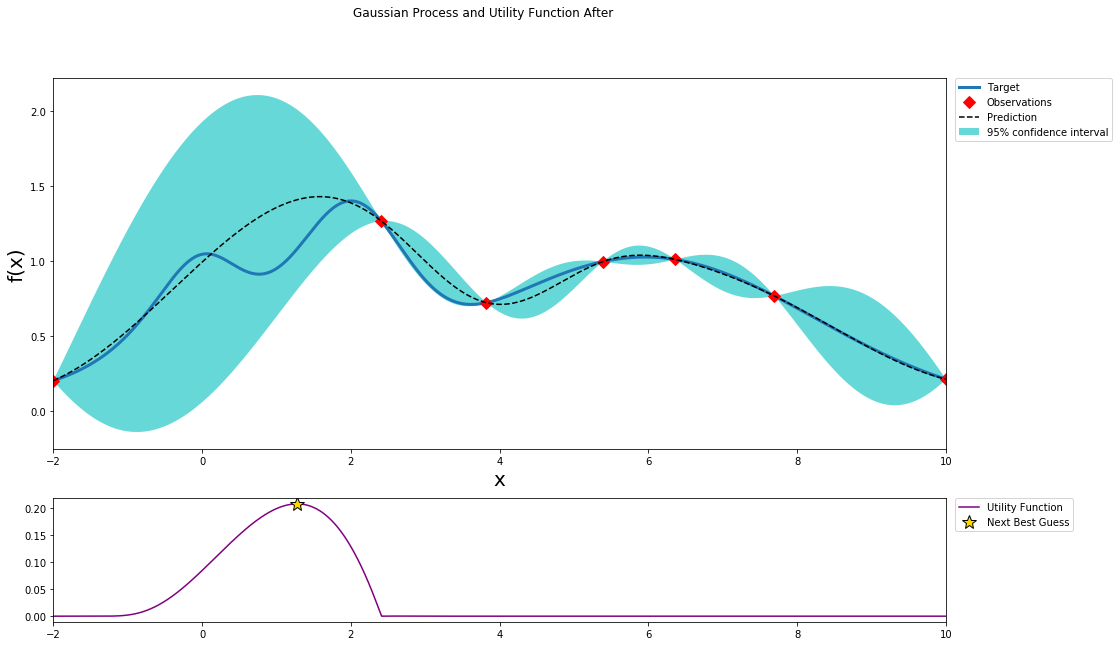

In [19]:
plot_gp(GP, x, y, "bla")

In [20]:
GP.work_for_steps(10)

{'x': 1.277840974961527}
{'x': 2.0849528554256387}
{'x': 1.951718698043052}
{'x': 1.9999999996331235}
{'x': 1.9999996346968143}


/home/users/saskia/hpo/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([2.93131395e-05]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 70, 'nit': 8, 'warnflag': 2}
  " state: %s" % convergence_dict)


{'x': 1.9999996346968143}
{'x': 1.9999996346968143}
{'x': 1.9999996346968143}


/home/users/saskia/hpo/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-8.47163046e-05]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 46, 'nit': 10, 'warnflag': 2}
  " state: %s" % convergence_dict)


{'x': 2.00000346617149}
{'x': 2.0014880095170793}


[2.00120012]


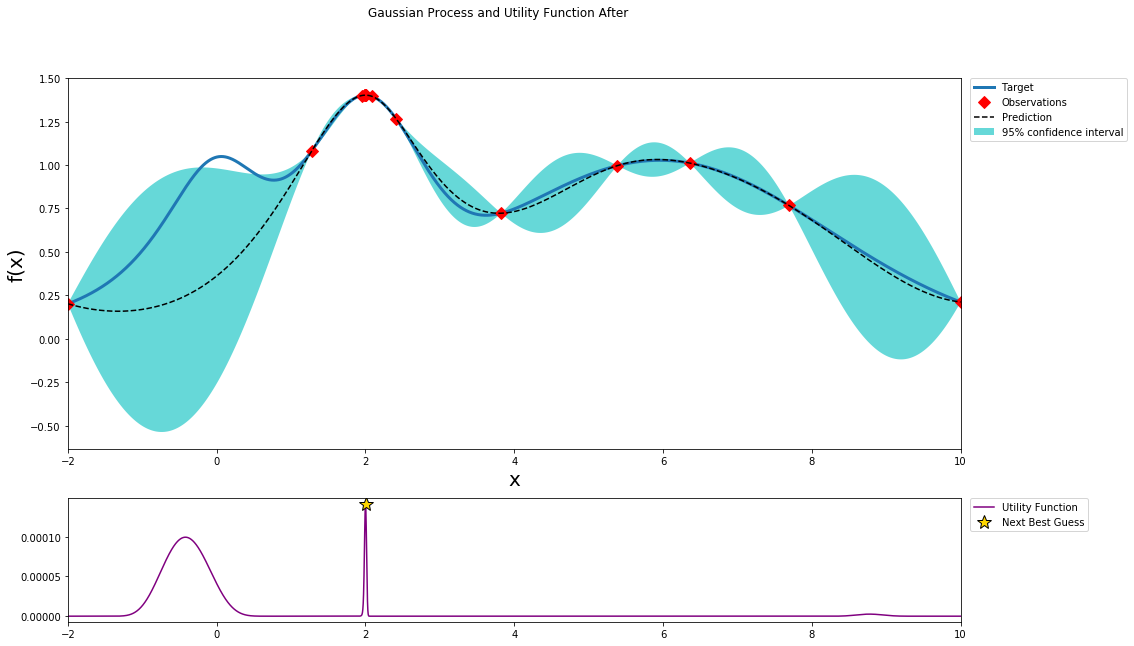

In [21]:
plot_gp(GP, x, y, "bla")

In [22]:
#all the points that were tested
print(GP.hp)

[[ 2.41094853]
 [ 6.3600433 ]
 [-2.        ]
 [10.        ]
 [ 3.82353378]
 [ 7.69385235]
 [ 5.38667481]
 [ 1.27784097]
 [ 2.08495286]
 [ 1.9517187 ]
 [ 2.        ]
 [ 1.99999963]
 [ 1.99999963]
 [ 1.99999963]
 [ 1.99999963]
 [ 2.00000347]
 [ 2.00148801]]


In [23]:
#all the results of the tested point in the actual function
print(GP.results)

[1.2671829  1.01124591 0.20166167 0.21179751 0.72267922 0.76718917
 0.99640766 1.08097539 1.39576774 1.39980783 1.40189652 1.40189652
 1.40189652 1.40189652 1.40189652 1.40189652 1.40189685]


In [24]:
print(GP.result_max)
print(GP.max_hp)

1.4018968545259038
{'x': 2.0014880095170793}
